## Statistics of Time Series

#### Concepts

* Random walk vs. white noise
* Stationarity
* Autocorrelation Plot
* Dickey-Fuller Test

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_pacf

### Time Series and Distribution Functions

Time series: Set of values for a variable that are sequenced in time. 

If there is no randomness and weak dependence in the process, the next data step can completely be determined using analytical solutions. 

But in most cases, there is some randomness or the underlying process is too complex to model analytically.

Instead, we model a time series as a **stochastic process** and at every time step, the 

**You can think of time series as a stochastic process in which, at each step, the value of the random variable is chosen from a distribution.**

### Example 1: Noise

In [34]:
# normally distributed random values
noise = np.random.normal(0.0, 2.0, size=500)
noise[:10]

array([ 2.15379469,  1.43289661,  1.17042673, -4.36836278, -1.78677581,
       -4.83522075,  1.73442938, -1.64190562, -0.23132647, -0.35796531])

<AxesSubplot:>

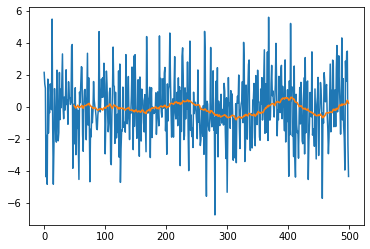

In [35]:
s = pd.Series(noise)
rm = s.rolling(window=50).mean()
s.plot()
rm.plot()  # mean is not fluctuating --> stationary

### Example 2: Random Walk

$y_t = y_{t-1} + \epsilon$

In [36]:
walk = np.cumsum(noise)


<AxesSubplot:>

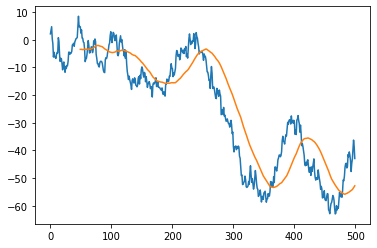

In [41]:
s = pd.Series(walk)
rm = s.rolling(window=50).mean()
s.plot()
rm.plot()  # mean *is* fluctuating --> NOT stationary

<AxesSubplot:>

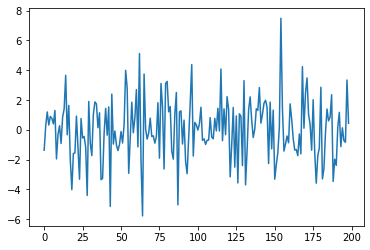

In [17]:
# opposite operation
n2 = np.diff(walk)  # calculates difference between consecutive values
pd.Series(n2).plot()

# another similar pair is: np.cumprod() ; inversion is pct_diff()
# DONT CALCULATE PERCENTUAL CHANGES WITH YOUR TEMPERATURE DATA!!!!!!!
# reason: we dot have a defined minimum zero for °C
# --> percentages only work with countable quantities

In [6]:
a = np.array([1, 2, 1, 4, -5])

In [18]:
b = np.cumsum(a)
b

array([1, 3, 4, 8, 3])

In [19]:
np.diff(b)  # lose the first data point

array([ 2,  1,  4, -5])

## Stationarity

### Why are we interested in stationarity?

TS DATA = TREND + SEASONALITY + NOISE + SHORT TERM EFFECTS

We want data to be stationary for short-term predictions

For long term prediction, you would try to use patterns like trend and seasonality. 

For the short term prediction you want the data to be stationary. This ensures that every value is drawn from the same distribution so it's statistical properties don't change over time. 

### Strict stationarity

Your time series is completely time invariant.
Its statistical properties do not change over time.

### Weak stationarity

Weak stationary processes have: 
    
* constant mean
* constant variance (and covariance)
* auto-covariance between $y_t$ and $y_{t-T}$ depends only on T
* no Unit Root

It can still be modelled as the same distribution.

### Trend stationarity
It has a predictable trend. In this case, the overall mean trend equals the trend between consecutive steps.

### Example 3: Autoregressive Process

this is a stationary process that is *not random*

$y_t = a_1y_{t-1} + a_2y_{t-2} + b + \epsilon$

<AxesSubplot:>

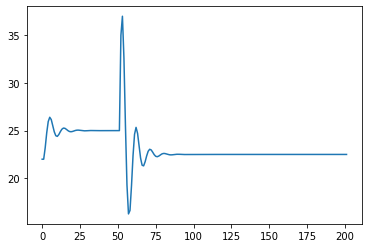

In [64]:
data = [22.0, 22.0]
noise = [0.0] * 50 + [10.0] + [0.0]* 149  # same as ['eminem'] * 10

for i in range(200):
    value = data[-1] * 1.3 - data[-2] * 0.7 + 10.0 + np.random.normal(size=1)[0]
    data.append(value)
    # with the pacf plot + ADF test we can determine that our data follows a process like this
    # but we dont know the coefficient values
    
data = pd.Series(data)
data.plot()

#### Q: what is missing from the implemented equation?

## How to find out whether a time series is stationary?

### Autocorrelation Plot

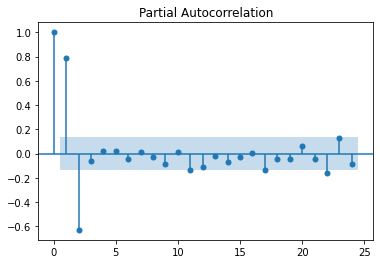

In [49]:
pacf = plot_pacf(data)  # also see: plot_acf(data)

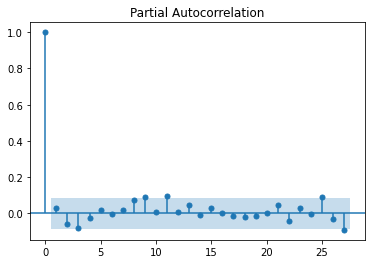

In [50]:
pacf = plot_pacf(noise)

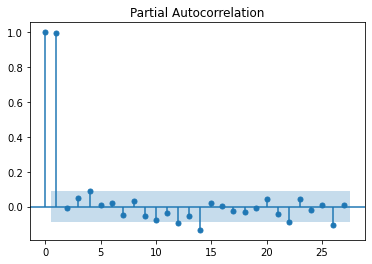

In [51]:
pacf = plot_pacf(walk)

### Unit Root

A non-stationary time-series might have a unit root which means the solution to the **characteristic equation** that relates to the differential has at least one root that is equal to 1 (could also be larger).

This results in an upredictable systematic pattern (as opposed to a stationary series we'd use to get some predictions from). For instance, if some extreme event happened and your equation has a root that is equal or larger than 1, the system is not able to just bounce back in next step as a stationary process should do, it will likely be affected by that event for many more steps after that as the underlying process is not dampening the effect.

**We want to know whether there is a Unit Root in the data. If there is a Unit Root, the data is non-stationary**

### Augmented Dickey-Fuller Test

Dickey - Fuller Test is a stationarity test for time series. It is measuring the likelihood of the solutions to the **differenced** form of the characteristic equation. Based on the significance level it associates with its statistical measure, you decide whether it's stationary or not.

The null hypothesis is that the time series is NOT-stationary. So a small p value means that you have a stationary series.

In [52]:
def print_adf(data):
    """ 
    Prints the results of the augmented Dickey Fuller Test
    """
    adf_stats, p, used_lag, n_obs, levels, information_criterion = \
            statsmodels.tsa.stattools.adfuller(data)
    
    print(f"""adf_stats: {adf_stats}
            p: {p} 
            used lag: {used_lag} 
            number of observations: {n_obs}
            
            CI 99%: {levels['1%']}
            CI 95%: {levels['5%']}
            CI 90%: {levels['10%']}
            information criterion (AIC): {information_criterion}
            """)

In [53]:
print_adf(noise) # p = 0.0 --> stationary

adf_stats: -21.610022255551854
            p: 0.0 
            used lag: 0 
            number of observations: 499
            
            CI 99%: -3.4435228622952065
            CI 95%: -2.867349510566146
            CI 90%: -2.569864247011056
            information criterion (AIC): 2015.0840184439471
            


In [55]:
print_adf(walk) # p > 0.05 ; do not reject the null hypothesis ; we don't know if it is stationary or not

adf_stats: -1.2798466465414908
            p: 0.6383413269207707 
            used lag: 0 
            number of observations: 499
            
            CI 99%: -3.4435228622952065
            CI 95%: -2.867349510566146
            CI 90%: -2.569864247011056
            information criterion (AIC): 2014.2091076485262
            


In [56]:
print_adf(data) # p close to 0.0 -> reject null hypothesis -> stationary

adf_stats: -9.570332411815414
            p: 2.2974121333165547e-16 
            used lag: 1 
            number of observations: 200
            
            CI 99%: -3.463476079125
            CI 95%: -2.876102355
            CI 90%: -2.574532225
            information criterion (AIC): 557.3275843382536
            


* The first number is the ADF-Stats, the more negative it is, the more confident we are that we don't have a random walk.

* In the lookup table (dictionary), the smallest value is -3.44 for the adf_stats. Hence from -32.75 < -3.4 we can reject the null hypothesis with a confidence level of more than 99% (p=0.01, highly significant result).


## Summary

How to analyze a time series?

1. EDA (plotting, examining periodicity of time stamps, rolling mean)
2. Decomposition -> trend + seasonality + rest
3. Look at the autocorrelation (acf / pacf) plot
    * see if there is still information left (any peaks after the first)
    * check if there is still seasonality in (peaks in the middle)
    * determine the number of lags for an AR model (all peaks outside the shaded area)
4. Check for stationarity (with the Dickey Fuller Test)
    * if it is stationary: good -> build a ARIMA model for the short-term prediction
    * if not, continue with step 5
5. if you have still seasonality or trend or the data is not stationary: **more EDA, continue decomposing**

### Exercise

Consider the flights data.

* Is the data stationary?
* Why or why not?
* What can you do with non-stationary data?

In [ ]:
flights = sns.load_dataset('flights')

## Further Reading:

**Time Series as Stochastic Processes:**
https://stats.stackexchange.com/questions/126791/is-a-time-series-the-same-as-a-stochastic-process
 
**Unit Root**
https://en.wikipedia.org/wiki/Unit_root

**Characteristic equation for Unit Roots**
https://en.wikipedia.org/wiki/Linear_difference_equation#Solution_of_homogeneous_case

**Augmented Dickey-Fuller Test**
https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

**ADF on statsmodels**
https://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.stattools.adfuller.html

**More about hypothesis testing**
https://statisticsbyjim.com/hypothesis-testing/one-tailed-two-tailed-hypothesis-tests/)


In [ ]:
flights = sns.load_dataset('flights')